In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import pandas as pd

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/pedro2/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/pedro2/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
torch.cuda.set_device(1)

In [5]:
PATH = 'words/'
csv_path = PATH + 'csv_files/g06.csv'
n = len(list(open(csv_path))) - 1 # -1 to ignore the header line
n

11626

In [6]:

arch = vgg16
sz = 64
bs = 64
val_idxs = get_cv_idxs(n)
tfms = tfms_from_model(arch, sz)

data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, bs = bs, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [7]:
# comparing instances of dataset object and original data

# picking first image (index 0)
x1 = data.trn_ds.get_x(0)

# picking file name of first image
path = data.trn_ds.fnames[0]
x2 = plt.imread(PATH + path)
# image in grayscale, repeat it 3 times to get RGB values
x2 = np.stack((x2, x2, x2), axis = 2)



(-0.5, 133.5, 63.5, -0.5)

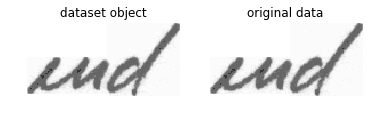

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(x1)
ax[0].axis('off')
ax[0].set(title = 'dataset object')
ax[1].imshow(x2)
ax[1].set(title = 'original data')
ax[1].axis('off')

In [9]:
fn = [PATH + data.trn_ds.fnames[0]]; fn

['words/png_files/g06-011a-00-02.png']

In [10]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz)
    return ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [11]:
learn = ConvLearner.pretrained(arch, data)

 90%|█████████ | 132/146 [01:27<00:09,  1.50it/s, loss=11.7]

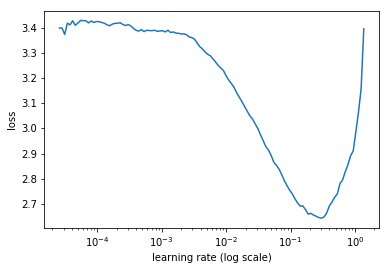

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

In [13]:
lr = 0.02
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.776649   1.36555    0.573763  
    1      1.474249   1.124153   0.635269                   
    2      1.348958   1.070005   0.652043                   
    3      1.343732   1.030254   0.661075                   
    4      1.252283   0.962204   0.689892                   
    5      1.159764   0.945812   0.704946                   
    6      1.165491   0.932429   0.704086                   


[array([0.93243]), 0.7040860216848311]

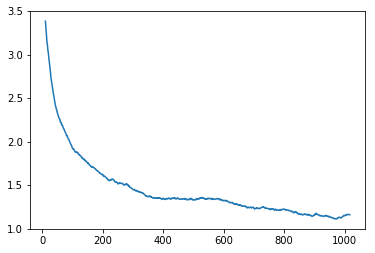

In [14]:
learn.sched.plot_loss()

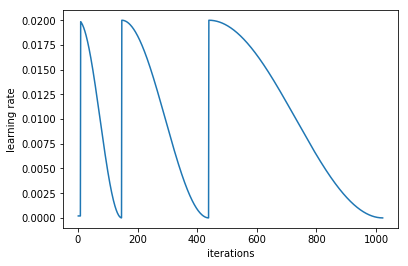

In [15]:
learn.sched.plot_lr()

In [16]:
lrs = np.array([lr/9,lr/3,lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.637335   0.36206    0.885591  
    1      0.456561   0.304152   0.892043                    
    2      0.312073   0.238565   0.915269                    
    3      0.32265    0.301661   0.896774                    
    4      0.265873   0.226165   0.927742                    
    5      0.212226   0.194336   0.935054                    
    6      0.186051   0.187963   0.938065                    


[array([0.18796]), 0.9380645161803051]

In [17]:
learn.save(f'{sz}')

In [18]:
tmfs = tfms_from_model(arch, sz, aug_tfms = transforms_side_on, max_zoom = 1.1)

In [19]:
data = ImageClassifierData.from_csv(path = PATH, folder = 'png_files', 
                                    csv_fname = csv_path, 
                                    tfms = tfms, val_idxs = val_idxs, 
                                    test_name = None )

In [20]:
learn_data_agumentation = ConvLearner.pretrained(arch, data)

 90%|█████████ | 132/146 [00:57<00:06,  2.31it/s, loss=11.3]

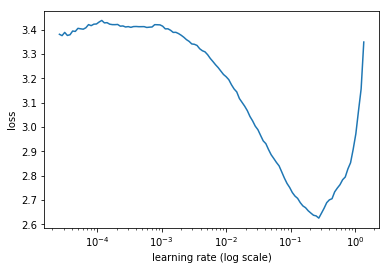

In [21]:
lrf=learn_data_agumentation.lr_find()
learn_data_agumentation.sched.plot()

In [22]:
lr = 0.02
learn_data_agumentation.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.766783   1.364567   0.575914  
    1      1.474636   1.116535   0.64129                    
    2      1.333984   1.079919   0.655914                   
    3      1.333993   1.028248   0.669677                   
    4      1.249498   0.983159   0.68043                    
    5      1.174786   0.940048   0.700645                   
    6      1.146303   0.932804   0.701075                   


[array([0.9328]), 0.7010752690222956]

In [23]:
lrs = np.array([lr/9,lr/3,lr])
learn_data_agumentation.unfreeze()
learn_data_agumentation.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.629344   0.365934   0.87914   
    1      0.449437   0.321001   0.900215                    
    2      0.312789   0.235959   0.925161                    
    3      0.346      0.294065   0.900215                    
    4      0.280828   0.209421   0.928172                    
    5      0.218607   0.186038   0.939355                    
    6      0.185108   0.182128   0.941505                    


[array([0.18213]), 0.9415053763953588]

In [24]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [25]:
accuracy_np(preds, y)

0.9483870967741935

In [26]:
multi_preds, y = learn_data_agumentation.TTA()
preds = np.mean(multi_preds, 0)

In [27]:
accuracy_np(preds,y)

0.9479569892473119